In [85]:
import pandas as pd 
import seaborn as sns 
import matplotlib as plt 
%matplotlib inline
import glob
import csv
import tarfile
from tqdm import tqdm
import json
import numpy as np

In [2]:
files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

['../BL_Work/openPrescribe/serialized/201009.gz', '../BL_Work/openPrescribe/serialized/201008.gz', '../BL_Work/openPrescribe/serialized/201011.gz', '../BL_Work/openPrescribe/serialized/201010.gz', '../BL_Work/openPrescribe/serialized/201012.gz']


In [4]:
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='Computation2.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [5]:
pdp = pd.read_csv(files[0],compression='gzip')
pdp.head(n=1000)

Unnamed: 0    0    1       2                3  \
0             0  Q30  5D7  A86001  0501013B0AAAJAJ   
1             1  Q30  5D7  A86003  0101010G0AAABAB   
2             2  Q30  5D7  A86003  0101010G0BBABAB   
3             3  Q30  5D7  A86003  0101010G0BCABAB   
4             4  Q30  5D7  A86003  0101010L0BBABAA   
5             5  Q30  5D7  A86003  0101010R0AAABAB   
6             6  Q30  5D7  A86003  0101010R0BCAAAB   
7             7  Q30  5D7  A86003  0101021B0AAAHAH   
8             8  Q30  5D7  A86003  0101021B0AAAJAJ   
9             9  Q30  5D7  A86003  0101021B0AAAPAP   
10           10  Q30  5D7  A86003  0101021B0AAAQAQ   
11           11  Q30  5D7  A86003  0101021B0BEADAJ   
12           12  Q30  5D7  A86003  0101021B0BEAIAL   
13           13  Q30  5D7  A86003  0101021B0BEAKAQ   
14           14  Q30  5D7  A86003  0101021B0BEAQAP   
15           15  Q30  5D7  A86003  0101021B0BFAAAF   
16           16  Q30  5D7  A86003  0101021B0BIAAAH   
17           17  Q30  5D7  A86003  0102000J0AAABAB   
18           18  Q30  5D7  A86003  0102000J0AAACAC   
19           19  Q30  5D7  A86003  0102000L0AAADAD   
20           20  Q30  5D7  A86003  0102000N0AAABAB   
21           21  Q30  5D7  A86003  0102000N0BBAAAB   
22           22  Q30  5D7  A86003  0102000P0AAABAB   
23           23  Q30  5D7  A86003  0102000P0AAADAD   
24           24  Q30  5D7  A86003  0102000P0BCABAB   
25           25  Q30  5D7  A86003  0102000T0AAAAAA   
26           26  Q30  5D7  A86003  0102000X0AAAAAA   
27           27  Q30  5D7  A86003  0102000Y0AAAFAF   
28           28  Q30  5D7  A86003  0103010D0AAAAAA   
29           29  Q30  5D7  A86003  0103010D0AAABAB   
..          ...  ...  ...     ...              ...   
970         970  Q30  5D7  A86003  0501050A0AAABAB   
971         971  Q30  5D7  A86003  0501050B0AAAAAA   
972         972  Q30  5D7  A86003  0501050B0AAADAD   
973         973  Q30  5D7  A86003  0501050C0AAABAB   
974         974  Q30  5D7  A86003  0501050C0AAAKAK   
975         975  Q30  5D7  A86003  0501050H0AAAAAA   
976         976  Q30  5D7  A86003  0501050H0AAABAB   
977         977  Q30  5D7  A86003  0501060D0AAABAB   
978         978  Q30  5D7  A86003  0501070I0AAABAB   
979         979  Q30  5D7  A86003  0501080D0AAACAC   
980         980  Q30  5D7  A86003  0501080D0AAAHAH   
981         981  Q30  5D7  A86003  0501080D0BGAAAH   
982         982  Q30  5D7  A86003  0501080W0AAADAD   
983         983  Q30  5D7  A86003  0501080W0AAAEAE   
984         984  Q30  5D7  A86003  0501080W0AAAIAI   
985         985  Q30  5D7  A86003  0501100H0AAAFAF   
986         986  Q30  5D7  A86003  0501110C0AAAEAE   
987         987  Q30  5D7  A86003  0501110C0AAAIAI   
988         988  Q30  5D7  A86003  0501110C0AAAJAJ   
989         989  Q30  5D7  A86003  0501110G0AAABAB   
990         990  Q30  5D7  A86003  0501120L0AAAAAA   
991         991  Q30  5D7  A86003  0501120L0AAAFAF   
992         992  Q30  5D7  A86003  0501120L0AAAJAJ   
993         993  Q30  5D7  A86003  0501120P0AAAAAA   
994         994  Q30  5D7  A86003  0501130R0AAAAAA   
995         995  Q30  5D7  A86003  0501130R0AAABAB   
996         996  Q30  5D7  A86003  0501130R0AAADAD   
997         997  Q30  5D7  A86003  0502000G0AAAAAA   
998         998  Q30  5D7  A86003  0502000G0AAABAB   
999         999  Q30  5D7  A86003  0502000M0AAAAAA   

                                            4      5        6        7  \
0    Amoxicillin_Oral Susp 125mg/5ml             1.0     1.69     1.59   
1    Co-Magaldrox_Susp 195mg/220mg/5ml S/F      44.0   124.96   116.45   
2    Maalox_Susp 195mg/220mg/5ml S/F             1.0     5.58     5.17   
3    Mucogel_Susp 195mg/220mg/5ml S/F            1.0     1.71     1.61   
4    Asilone_Susp S/F                            1.0     1.95     1.83   
5    Simeticone_Susp 40mg/ml S/F                 1.0     2.26     2.11   
6    Infacol_Susp 40mg/ml S/F                    1.0     4.52     4.19   
7    Gppe Liq_Gaviscon S/F                       1.0     5.24   

In [6]:
pdp['10']= pdp['10'].str.split(' ', n = 1, expand = True)

In [7]:
pdp.head(n=1000)

Unnamed: 0    0    1       2                3  \
0             0  Q30  5D7  A86001  0501013B0AAAJAJ   
1             1  Q30  5D7  A86003  0101010G0AAABAB   
2             2  Q30  5D7  A86003  0101010G0BBABAB   
3             3  Q30  5D7  A86003  0101010G0BCABAB   
4             4  Q30  5D7  A86003  0101010L0BBABAA   
5             5  Q30  5D7  A86003  0101010R0AAABAB   
6             6  Q30  5D7  A86003  0101010R0BCAAAB   
7             7  Q30  5D7  A86003  0101021B0AAAHAH   
8             8  Q30  5D7  A86003  0101021B0AAAJAJ   
9             9  Q30  5D7  A86003  0101021B0AAAPAP   
10           10  Q30  5D7  A86003  0101021B0AAAQAQ   
11           11  Q30  5D7  A86003  0101021B0BEADAJ   
12           12  Q30  5D7  A86003  0101021B0BEAIAL   
13           13  Q30  5D7  A86003  0101021B0BEAKAQ   
14           14  Q30  5D7  A86003  0101021B0BEAQAP   
15           15  Q30  5D7  A86003  0101021B0BFAAAF   
16           16  Q30  5D7  A86003  0101021B0BIAAAH   
17           17  Q30  5D7  A86003  0102000J0AAABAB   
18           18  Q30  5D7  A86003  0102000J0AAACAC   
19           19  Q30  5D7  A86003  0102000L0AAADAD   
20           20  Q30  5D7  A86003  0102000N0AAABAB   
21           21  Q30  5D7  A86003  0102000N0BBAAAB   
22           22  Q30  5D7  A86003  0102000P0AAABAB   
23           23  Q30  5D7  A86003  0102000P0AAADAD   
24           24  Q30  5D7  A86003  0102000P0BCABAB   
25           25  Q30  5D7  A86003  0102000T0AAAAAA   
26           26  Q30  5D7  A86003  0102000X0AAAAAA   
27           27  Q30  5D7  A86003  0102000Y0AAAFAF   
28           28  Q30  5D7  A86003  0103010D0AAAAAA   
29           29  Q30  5D7  A86003  0103010D0AAABAB   
..          ...  ...  ...     ...              ...   
970         970  Q30  5D7  A86003  0501050A0AAABAB   
971         971  Q30  5D7  A86003  0501050B0AAAAAA   
972         972  Q30  5D7  A86003  0501050B0AAADAD   
973         973  Q30  5D7  A86003  0501050C0AAABAB   
974         974  Q30  5D7  A86003  0501050C0AAAKAK   
975         975  Q30  5D7  A86003  0501050H0AAAAAA   
976         976  Q30  5D7  A86003  0501050H0AAABAB   
977         977  Q30  5D7  A86003  0501060D0AAABAB   
978         978  Q30  5D7  A86003  0501070I0AAABAB   
979         979  Q30  5D7  A86003  0501080D0AAACAC   
980         980  Q30  5D7  A86003  0501080D0AAAHAH   
981         981  Q30  5D7  A86003  0501080D0BGAAAH   
982         982  Q30  5D7  A86003  0501080W0AAADAD   
983         983  Q30  5D7  A86003  0501080W0AAAEAE   
984         984  Q30  5D7  A86003  0501080W0AAAIAI   
985         985  Q30  5D7  A86003  0501100H0AAAFAF   
986         986  Q30  5D7  A86003  0501110C0AAAEAE   
987         987  Q30  5D7  A86003  0501110C0AAAIAI   
988         988  Q30  5D7  A86003  0501110C0AAAJAJ   
989         989  Q30  5D7  A86003  0501110G0AAABAB   
990         990  Q30  5D7  A86003  0501120L0AAAAAA   
991         991  Q30  5D7  A86003  0501120L0AAAFAF   
992         992  Q30  5D7  A86003  0501120L0AAAJAJ   
993         993  Q30  5D7  A86003  0501120P0AAAAAA   
994         994  Q30  5D7  A86003  0501130R0AAAAAA   
995         995  Q30  5D7  A86003  0501130R0AAABAB   
996         996  Q30  5D7  A86003  0501130R0AAADAD   
997         997  Q30  5D7  A86003  0502000G0AAAAAA   
998         998  Q30  5D7  A86003  0502000G0AAABAB   
999         999  Q30  5D7  A86003  0502000M0AAAAAA   

                                            4      5        6        7  \
0    Amoxicillin_Oral Susp 125mg/5ml             1.0     1.69     1.59   
1    Co-Magaldrox_Susp 195mg/220mg/5ml S/F      44.0   124.96   116.45   
2    Maalox_Susp 195mg/220mg/5ml S/F             1.0     5.58     5.17   
3    Mucogel_Susp 195mg/220mg/5ml S/F            1.0     1.71     1.61   
4    Asilone_Susp S/F                            1.0     1.95     1.83   
5    Simeticone_Susp 40mg/ml S/F                 1.0     2.26     2.11   
6    Infacol_Susp 40mg/ml S/F                    1.0     4.52     4.19   
7    Gppe Liq_Gaviscon S/F                       1.0     5.24   

In [8]:
UK_Admin = pd.read_csv('../BL_Work/Admin areas.csv')

In [9]:

UK_postCode = pd.read_csv('../BL_Work/Postcode districts.csv')
UK_postCode.head()
# len(UK_postCode)

Postcode  Latitude  Longitude   Easting  Northing Grid Reference  \
0      AB1   57.1269   -2.13644  391839.0  804005.0       NJ918040   
1      AB2   57.1713   -2.14152  391541.0  808948.0       NJ915089   
2      AB3   57.0876   -2.59624  363963.0  799780.0       NO639997   
3      AB4   57.5343   -2.12713  392487.0  849358.0       NJ924493   
4      AB5   57.4652   -2.64764  361248.0  841843.0       NJ612418   

                         Town/Area    Region  Postcodes  Active postcodes  \
0                         Aberdeen  Aberdeen     2655.0               0.0   
1                         Aberdeen  Aberdeen     3070.0               0.0   
2                         Aberdeen  Aberdeen     2168.0               0.0   
3  Fraserburgh, Peterhead, Macduff  Aberdeen     2956.0               0.0   
4        Buckie, Huntly, Inverurie  Aberdeen     3002.0               0.0   

   Population  Households                                   Nearby districts  
0         NaN         NaN  AB10, AB15, AB9, AB25, AB2, AB12, AB16, AB11, ...  
1         NaN         NaN  AB16, AB22, AB24, AB25, AB1, AB9, AB15, AB10, ...  
2         NaN         NaN  AB31, AB34, AB52, AB33, AB14, AB32, AB30, AB13...  
3         NaN         NaN  AB41, AB43, AB42, AB53, AB22, AB23, AB2, AB24,...  
4         NaN         NaN  AB54, AB52, AB45, AB53, AB33, AB44, AB55, AB51...

In [10]:
UK_postCode.columns

Index([u'Postcode', u'Latitude', u'Longitude', u'Easting', u'Northing',
       u'Grid Reference', u'Town/Area', u'Region', u'Postcodes',
       u'Active postcodes', u'Population', u'Households', u'Nearby districts'],
      dtype='object')

In [11]:
district_pop = {}
for index , row in UK_Admin.iterrows():
    district_pop[row['District']] = row['Population']
    

In [12]:
districts = set(UK_postCode['Region']).intersection(UK_Admin['District'])

In [13]:
districts

{'Aberdeenshire',
 'Adur',
 'Allerdale',
 'Amber Valley',
 'Angus',
 'Argyll and Bute',
 'Arun',
 'Ashfield',
 'Ashford',
 'Aylesbury Vale',
 'Babergh',
 'Barking and Dagenham',
 'Barnet',
 'Barnsley',
 'Barrow-in-Furness',
 'Basildon',
 'Bassetlaw',
 'Bath and North East Somerset',
 'Bedford',
 'Belfast',
 'Bexley',
 'Birmingham',
 'Blackburn with Darwen',
 'Blackpool',
 'Blaenau Gwent',
 'Bolsover',
 'Bolton',
 'Boston',
 'Bracknell Forest',
 'Bradford',
 'Braintree',
 'Breckland',
 'Brent',
 'Brentwood',
 'Bridgend',
 'Brighton and Hove',
 'Bromley',
 'Bromsgrove',
 'Broxbourne',
 'Broxtowe',
 'Burnley',
 'Bury',
 'Caerphilly',
 'Calderdale',
 'Cambridge',
 'Camden',
 'Cannock Chase',
 'Canterbury',
 'Cardiff',
 'Carlisle',
 'Carmarthenshire',
 'Castle Point',
 'Central Bedfordshire',
 'Ceredigion',
 'Charnwood',
 'Chelmsford',
 'Cherwell',
 'Cheshire East',
 'Cheshire West and Chester',
 'Chesterfield',
 'Chichester',
 'Chiltern',
 'Chorley',
 'City of London',
 'Colchester',
 'Con

In [14]:
postCodeDict = {}
for name, group in UK_postCode.groupby('Region'):
    if name in districts:
        postCodeDict[name] = {}
        postCodeDict[name]['postcodes']=list(group['Nearby districts'])
        postCodeDict[name]['pop'] = district_pop[name]

for k in postCodeDict:
    actualcodes = []
    codes = postCodeDict[k]['postcodes']
    for c in codes:
        try:
            actualcodes+= [w.strip() for w in c.split(',')]
        except:
            print c
    postCodeDict[k]['postcodes'] = actualcodes
print postCodeDict

nan
nan
nan
nan
nan
nan
nan
{'Rhondda Cynon Taf': {'postcodes': ['CF38', 'CF39', 'CF46', 'CF45', 'CF8', 'CF83', 'CF15', 'CF72', 'CF40', 'CF82', 'CF37', 'CF15', 'CF72', 'CF39', 'CF46', 'CF83', 'CF45', 'CF7', 'CF4', 'CF8', 'CF40', 'CF43', 'CF37', 'CF72', 'CF41', 'CF7', 'CF45', 'CF38', 'CF44', 'CF42', 'CF43', 'CF39', 'CF41', 'CF44', 'CF42', 'CF37', 'CF45', 'CF72', 'CF7', 'CF35', 'CF43', 'CF40', 'CF42', 'CF44', 'CF39', 'CF45', 'CF35', 'CF32', 'CF37', 'CF46', 'CF41', 'CF43', 'CF40', 'CF44', 'CF35', 'CF39', 'CF45', 'CF32', 'CF34', 'CF31', 'CF40', 'CF41', 'CF44', 'CF39', 'CF42', 'CF45', 'CF46', 'CF48', 'CF47', 'CF37', 'CF43', 'CF41', 'CF40', 'CF48', 'CF47', 'CF42', 'CF45', 'CF39', 'CF46', 'NP24', 'CF46', 'CF48', 'CF47', 'CF37', 'CF43', 'CF39', 'CF38', 'CF40', 'CF44', 'CF41', 'CF7', 'CF38', 'CF39', 'CF15', 'CF35', 'CF37', 'CF71', 'CF40', 'CF43', 'CF45'], 'pop': 234387}, 'Mendip': {'postcodes': ['BA7', 'BA10', 'BS39', 'BA5', 'BA3', 'BA6', 'BA9', 'BS18', 'DT9', 'BA16', 'BA6', 'BA4', 'BA16', 'BS4

In [15]:
# postCodeDict

In [16]:
diseaseMatched = json.load(open('DiseasesMatched.json','rb'))

In [17]:
symMatched = json.load(open('SymptomsMatched.json','rb'))

In [18]:
symMatched

{u'"Abdominal+bloating"': {u'MatchedDrugs': [[u'Magaldrate']],
  u'Synonyms': [u'Matched Synonyms:  Abdominal bloating  ']},
 u'"Abdominal+pain"': {u'MatchedDrugs': [[u'Hyoscyamine']],
  u'Synonyms': [u'Matched Synonyms:  Abdominal Pain ... Abdominal pain NOS  ']},
 u'"Abnormal+gait"': {u'MatchedDrugs': [], u'Synonyms': []},
 u'"Abnormal+sexual+function"': {u'MatchedDrugs': [], u'Synonyms': []},
 u'"Amnesia"': {u'MatchedDrugs': [], u'Synonyms': []},
 u'"Anger+reaction"': {u'MatchedDrugs': [], u'Synonyms': []},
 u'"Anxiety"': {u'MatchedDrugs': [[u'Bromazepam ',
    u' Chlordiazepoxide ',
    u' Clorazepic acid ',
    u' Hydroxyzine'],
   [u'Buspirone ',
    u' Chlordiazepoxide ',
    u' Diazepam ',
    u' Lorazepam ',
    u' Meprobamate ',
    u' Oxazepam'],
   [u'Chlorpromazine'],
   [u'Acetylsalicylic acid ',
    u' Alprazolam ',
    u' Amoxapine ',
    u' Chlordiazepoxide ',
    u' Diazepam ',
    u' Doxepin ',
    u' Lorazepam ',
    u' Maprotiline ',
    u' Methotrimeprazine ',
   

In [96]:
# diseaseMatched

In [26]:
def countDiseasePrescriptions(boroughDict,diseasedPriscriptions):
    diseasePrescriptionCount = {}
    for k in boroughDict:
        if k not in diseasePrescriptionCount:
            diseasePrescriptionCount[k] = 0
            areas = boroughDict[k]['postcodes']
            area_disease = diseasedPriscriptions[diseasedPriscriptions['10'].isin(areas)]
            diseasePrescriptionCount[k] = len(area_disease)
    return diseasePrescriptionCount


def countAllPrescriptions(boroughDict,allPriscriptions):
    allPrescriptionCount = {}
    for k in boroughDict:
        if k not in allPrescriptionCount:
            allPrescriptionCount[k] = 0
            areas = boroughDict[k]['postcodes']
            all_disease = allPriscriptions[allPriscriptions['10'].isin(areas)]
            print "Found %d prescription in %s"%(len(all_disease),k)
            allPrescriptionCount[k] = len(all_disease)
    return allPrescriptionCount

In [21]:
# monthDisease = {}
# for f in files:
#     month = f.split('/')[-1].split('.')[0]
#     print "Working with %s month"%(month)
#     pdp = pd.read_csv(f,compression='gzip')
#     pdp['10']= pdp['10'].str.split(' ', n = 1, expand = True)
#     monthDisease[month]={}
#     for d in diseaseMatched:
#         key = d.replace('\"','').replace('+',' ').replace('\\','')
#         disease_df = pdp[pdp['12'] == key]
#         print "Working with disease %s with total %d prescriptions"%(key,len(disease_df))
#         disease_prescriptions = countDiseasePrescriptions(postCodeDict,disease_df)
#         monthDisease[month][d] = disease_prescriptions
        

In [22]:
# monthDisease

In [23]:
# %store monthDisease

In [24]:
# monthSymptom = {}
# for f in tqdm(files):
#     month = f.split('/')[-1].split('.')[0]
#     print "Working with %s month"%(month)
#     pdp = pd.read_csv(f,compression='gzip')
#     pdp['10']= pdp['10'].str.split(' ', n = 1, expand = True)
#     monthSymptom[month]={}
#     for d in tqdm(symMatched):
#         key = d.replace('\"','').replace('+',' ').replace('\\','')
#         disease_df = pdp[pdp['13'] == key]
#         print "Working with disease %s with total %d prescriptions"%(key,len(disease_df))
#         disease_prescriptions = countDiseasePrescriptions(postCodeDict,disease_df)
#         monthSymptom[month][d] = disease_prescriptions

In [30]:
AllPresc = {}
for f in tqdm(files):
    month = f.split('/')[-1].split('.')[0]
    AllPresc[month] = {}
    logger.debug("Working with %s month",(month))
    pdp = pd.read_csv(f,compression='gzip')
    pdp['10']= pdp['10'].str.split(' ', n = 1, expand = True)
    all_prescriptions = countAllPrescriptions(postCodeDict,pdp)
    AllPresc[month] = all_prescriptions

  0%|          | 0/5 [00:00<?, ?it/s]

Found 0 prescription in Rhondda Cynon Taf
Found 79305 prescription in Mendip
Found 204676 prescription in Newham
Found 80395 prescription in Wychavon
Found 61311 prescription in Wyre Forest
Found 93254 prescription in Peterborough
Found 167877 prescription in Epping Forest
Found 0 prescription in Blaenau Gwent
Found 42219 prescription in Hambleton
Found 24397 prescription in Flintshire
Found 184174 prescription in Dudley
Found 205337 prescription in Barnet
Found 154948 prescription in Warrington
Found 107442 prescription in Tonbridge and Malling
Found 93198 prescription in Tower Hamlets
Found 75368 prescription in Cotswold
Found 172990 prescription in South Staffordshire
Found 90123 prescription in Ribble Valley
Found 65101 prescription in Chiltern
Found 208582 prescription in Enfield
Found 0 prescription in Belfast
Found 82181 prescription in Castle Point
Found 171176 prescription in Rochdale
Found 166665 prescription in Stockport
Found 125010 prescription in Sunderland
Found 308153 p

Found 86541 prescription in Craven
Found 0 prescription in Ceredigion
Found 168439 prescription in Hillingdon
Found 113626 prescription in Tewkesbury
Found 132204 prescription in Amber Valley
Found 17151 prescription in Powys
Found 77604 prescription in Crawley
Found 38759 prescription in Canterbury
Found 56049 prescription in Torbay
Found 61215 prescription in Mid Devon
Found 52499 prescription in North West Leicestershire
Found 44053 prescription in Rutland
Found 129907 prescription in Elmbridge
Found 0 prescription in Highland
Found 149028 prescription in Bolton
Found 86286 prescription in Braintree
Found 121244 prescription in Sutton
Found 48069 prescription in Hastings
Found 0 prescription in Caerphilly
Found 121377 prescription in Cannock Chase
Found 79991 prescription in St Albans
Found 160647 prescription in Hertsmere
Found 152581 prescription in Walsall
Found 0 prescription in North Ayrshire
Found 87220 prescription in Preston
Found 127007 prescription in South Kesteven
Found 

 20%|██        | 1/5 [02:09<08:37, 129.48s/it]

Found 106786 prescription in Ashfield
Found 43544 prescription in Swindon
Found 29086 prescription in Barrow-in-Furness
Found 0 prescription in Rhondda Cynon Taf
Found 76365 prescription in Mendip
Found 199213 prescription in Newham
Found 78436 prescription in Wychavon
Found 60242 prescription in Wyre Forest
Found 90390 prescription in Peterborough
Found 162182 prescription in Epping Forest
Found 0 prescription in Blaenau Gwent
Found 40643 prescription in Hambleton
Found 23536 prescription in Flintshire
Found 178770 prescription in Dudley
Found 199597 prescription in Barnet
Found 149034 prescription in Warrington
Found 104280 prescription in Tonbridge and Malling
Found 91505 prescription in Tower Hamlets
Found 73471 prescription in Cotswold
Found 168653 prescription in South Staffordshire
Found 87058 prescription in Ribble Valley
Found 63387 prescription in Chiltern
Found 201492 prescription in Enfield
Found 0 prescription in Belfast
Found 79430 prescription in Castle Point
Found 16580

Found 309071 prescription in Cheshire East
Found 0 prescription in West Lothian
Found 83301 prescription in Craven
Found 0 prescription in Ceredigion
Found 162301 prescription in Hillingdon
Found 110521 prescription in Tewkesbury
Found 127574 prescription in Amber Valley
Found 16372 prescription in Powys
Found 75174 prescription in Crawley
Found 37217 prescription in Canterbury
Found 54464 prescription in Torbay
Found 59551 prescription in Mid Devon
Found 50417 prescription in North West Leicestershire
Found 42910 prescription in Rutland
Found 126086 prescription in Elmbridge
Found 0 prescription in Highland
Found 143985 prescription in Bolton
Found 84242 prescription in Braintree
Found 117443 prescription in Sutton
Found 46572 prescription in Hastings
Found 0 prescription in Caerphilly
Found 117268 prescription in Cannock Chase
Found 77625 prescription in St Albans
Found 156673 prescription in Hertsmere
Found 148210 prescription in Walsall
Found 0 prescription in North Ayrshire
Found 

 40%|████      | 2/5 [04:12<06:18, 126.04s/it]

Found 103852 prescription in Ashfield
Found 42176 prescription in Swindon
Found 27877 prescription in Barrow-in-Furness
Found 0 prescription in Rhondda Cynon Taf
Found 77671 prescription in Mendip
Found 204787 prescription in Newham
Found 79892 prescription in Wychavon
Found 61075 prescription in Wyre Forest
Found 93424 prescription in Peterborough
Found 165656 prescription in Epping Forest
Found 0 prescription in Blaenau Gwent
Found 41276 prescription in Hambleton
Found 23726 prescription in Flintshire
Found 183428 prescription in Dudley
Found 204612 prescription in Barnet
Found 151764 prescription in Warrington
Found 106678 prescription in Tonbridge and Malling
Found 94105 prescription in Tower Hamlets
Found 74618 prescription in Cotswold
Found 173801 prescription in South Staffordshire
Found 88408 prescription in Ribble Valley
Found 65705 prescription in Chiltern
Found 207580 prescription in Enfield
Found 0 prescription in Belfast
Found 80814 prescription in Castle Point
Found 16868

Found 178071 prescription in Gloucester
Found 312901 prescription in Cheshire East
Found 0 prescription in West Lothian
Found 84765 prescription in Craven
Found 0 prescription in Ceredigion
Found 167937 prescription in Hillingdon
Found 112440 prescription in Tewkesbury
Found 129809 prescription in Amber Valley
Found 16688 prescription in Powys
Found 76642 prescription in Crawley
Found 37714 prescription in Canterbury
Found 55130 prescription in Torbay
Found 61621 prescription in Mid Devon
Found 51754 prescription in North West Leicestershire
Found 43842 prescription in Rutland
Found 128945 prescription in Elmbridge
Found 0 prescription in Highland
Found 146892 prescription in Bolton
Found 85295 prescription in Braintree
Found 119509 prescription in Sutton
Found 47959 prescription in Hastings
Found 0 prescription in Caerphilly
Found 121461 prescription in Cannock Chase
Found 79243 prescription in St Albans
Found 159727 prescription in Hertsmere
Found 152844 prescription in Walsall
Found

 60%|██████    | 3/5 [06:19<04:12, 126.33s/it]

Found 105090 prescription in Ashfield
Found 42919 prescription in Swindon
Found 28775 prescription in Barrow-in-Furness
Found 0 prescription in Rhondda Cynon Taf
Found 77555 prescription in Mendip
Found 202801 prescription in Newham
Found 78669 prescription in Wychavon
Found 59706 prescription in Wyre Forest
Found 92642 prescription in Peterborough
Found 165542 prescription in Epping Forest
Found 0 prescription in Blaenau Gwent
Found 41589 prescription in Hambleton
Found 23537 prescription in Flintshire
Found 180519 prescription in Dudley
Found 202892 prescription in Barnet
Found 150584 prescription in Warrington
Found 105310 prescription in Tonbridge and Malling
Found 93003 prescription in Tower Hamlets
Found 73511 prescription in Cotswold
Found 170106 prescription in South Staffordshire
Found 88361 prescription in Ribble Valley
Found 65299 prescription in Chiltern
Found 204790 prescription in Enfield
Found 0 prescription in Belfast
Found 82437 prescription in Castle Point
Found 16909

Found 72156 prescription in Mid Suffolk
Found 176752 prescription in Gloucester
Found 310761 prescription in Cheshire East
Found 0 prescription in West Lothian
Found 84219 prescription in Craven
Found 0 prescription in Ceredigion
Found 166902 prescription in Hillingdon
Found 111640 prescription in Tewkesbury
Found 129115 prescription in Amber Valley
Found 16685 prescription in Powys
Found 76516 prescription in Crawley
Found 37242 prescription in Canterbury
Found 54529 prescription in Torbay
Found 60638 prescription in Mid Devon
Found 51276 prescription in North West Leicestershire
Found 43536 prescription in Rutland
Found 128476 prescription in Elmbridge
Found 0 prescription in Highland
Found 145539 prescription in Bolton
Found 85007 prescription in Braintree
Found 119217 prescription in Sutton
Found 47885 prescription in Hastings
Found 0 prescription in Caerphilly
Found 119120 prescription in Cannock Chase
Found 78311 prescription in St Albans
Found 158348 prescription in Hertsmere
Fo

 80%|████████  | 4/5 [08:21<02:05, 125.42s/it]

Found 104699 prescription in Ashfield
Found 42131 prescription in Swindon
Found 28391 prescription in Barrow-in-Furness
Found 0 prescription in Rhondda Cynon Taf
Found 79127 prescription in Mendip
Found 202768 prescription in Newham
Found 80232 prescription in Wychavon
Found 61120 prescription in Wyre Forest
Found 94719 prescription in Peterborough
Found 166546 prescription in Epping Forest
Found 0 prescription in Blaenau Gwent
Found 41792 prescription in Hambleton
Found 23895 prescription in Flintshire
Found 182264 prescription in Dudley
Found 204026 prescription in Barnet
Found 152953 prescription in Warrington
Found 105901 prescription in Tonbridge and Malling
Found 92981 prescription in Tower Hamlets
Found 75546 prescription in Cotswold
Found 173560 prescription in South Staffordshire
Found 88528 prescription in Ribble Valley
Found 66250 prescription in Chiltern
Found 206687 prescription in Enfield
Found 0 prescription in Belfast
Found 81299 prescription in Castle Point
Found 17070

Found 74408 prescription in Mid Suffolk
Found 180050 prescription in Gloucester
Found 315221 prescription in Cheshire East
Found 0 prescription in West Lothian
Found 85303 prescription in Craven
Found 0 prescription in Ceredigion
Found 168352 prescription in Hillingdon
Found 113523 prescription in Tewkesbury
Found 129952 prescription in Amber Valley
Found 17017 prescription in Powys
Found 76791 prescription in Crawley
Found 37655 prescription in Canterbury
Found 54867 prescription in Torbay
Found 61647 prescription in Mid Devon
Found 52135 prescription in North West Leicestershire
Found 44120 prescription in Rutland
Found 130316 prescription in Elmbridge
Found 0 prescription in Highland
Found 147611 prescription in Bolton
Found 86094 prescription in Braintree
Found 119652 prescription in Sutton
Found 47928 prescription in Hastings
Found 0 prescription in Caerphilly
Found 121936 prescription in Cannock Chase
Found 79207 prescription in St Albans
Found 159299 prescription in Hertsmere
Fo

100%|██████████| 5/5 [10:31<00:00, 126.27s/it]

Found 105441 prescription in Ashfield
Found 43000 prescription in Swindon
Found 28831 prescription in Barrow-in-Furness


In [32]:
AllPresc

{'201008': {'Aberdeenshire': 0,
  'Adur': 51504,
  'Allerdale': 53571,
  'Amber Valley': 127574,
  'Angus': 0,
  'Argyll and Bute': 0,
  'Arun': 56646,
  'Ashfield': 103852,
  'Ashford': 98500,
  'Aylesbury Vale': 70388,
  'Babergh': 76922,
  'Barking and Dagenham': 128088,
  'Barnet': 199597,
  'Barnsley': 185637,
  'Barrow-in-Furness': 27877,
  'Basildon': 80321,
  'Bassetlaw': 100014,
  'Bath and North East Somerset': 126401,
  'Bedford': 157843,
  'Belfast': 0,
  'Bexley': 129692,
  'Birmingham': 335784,
  'Blackburn with Darwen': 124080,
  'Blackpool': 93626,
  'Blaenau Gwent': 0,
  'Bolsover': 99745,
  'Bolton': 143985,
  'Boston': 71018,
  'Bracknell Forest': 95131,
  'Bradford': 166261,
  'Braintree': 84242,
  'Breckland': 57655,
  'Brent': 200226,
  'Brentwood': 91305,
  'Bridgend': 0,
  'Brighton and Hove': 81228,
  'Bromley': 227027,
  'Bromsgrove': 58889,
  'Broxbourne': 87975,
  'Broxtowe': 119922,
  'Burnley': 78279,
  'Bury': 127645,
  'Caerphilly': 0,
  'Calderdale': 16

In [33]:
%store AllPresc

Stored 'AllPresc' (dict)


In [40]:
# normalizedDict = {}
# for month in AllPresc:
#     normalizedDict[month] = {}
#     for k in AllPresc[month]:
#         normalizedDict[month][k] = AllPresc[month][k]*district_pop[k]

In [41]:
normalizedDict

{'201008': {'Aberdeenshire': 0,
  'Adur': 3150345168,
  'Allerdale': 5168047941,
  'Amber Valley': 15606765290,
  'Angus': 0,
  'Argyll and Bute': 0,
  'Arun': 8469426690,
  'Ashfield': 12413533412,
  'Ashford': 11615317000,
  'Aylesbury Vale': 12250609072,
  'Babergh': 6742905598,
  'Barking and Dagenham': 23821037712,
  'Barnet': 71094255833,
  'Barnsley': 42907393632,
  'Barrow-in-Furness': 1926440085,
  'Basildon': 14021717291,
  'Bassetlaw': 11287880082,
  'Bath and North East Somerset': 22242531168,
  'Bedford': 24854116623,
  'Belfast': 0,
  'Bexley': 30080114020,
  'Birmingham': 360245528616,
  'Blackburn with Darwen': 18304653840,
  'Blackpool': 13302475706,
  'Blaenau Gwent': 0,
  'Bolsover': 7564261820,
  'Bolton': 39857927700,
  'Boston': 4591029628,
  'Bracknell Forest': 10756367039,
  'Bradford': 86859734230,
  'Braintree': 12392672136,
  'Breckland': 7524438740,
  'Brent': 62325548376,
  'Brentwood': 6717674070,
  'Bridgend': 0,
  'Brighton and Hove': 22209034848,
  'Bro

In [37]:
%store -r monthDisease

In [46]:
monthDisease

{'201008': {u'"Meniere\'s disease"': {'Aberdeenshire': 0,
   'Adur': 121,
   'Allerdale': 242,
   'Amber Valley': 401,
   'Angus': 0,
   'Argyll and Bute': 0,
   'Arun': 193,
   'Ashfield': 258,
   'Ashford': 476,
   'Aylesbury Vale': 330,
   'Babergh': 183,
   'Barking and Dagenham': 593,
   'Barnet': 1158,
   'Barnsley': 846,
   'Barrow-in-Furness': 177,
   'Basildon': 696,
   'Bassetlaw': 212,
   'Bath and North East Somerset': 390,
   'Bedford': 734,
   'Belfast': 0,
   'Bexley': 723,
   'Birmingham': 4067,
   'Blackburn with Darwen': 428,
   'Blackpool': 731,
   'Blaenau Gwent': 0,
   'Bolsover': 178,
   'Bolton': 1236,
   'Boston': 205,
   'Bracknell Forest': 306,
   'Bradford': 1456,
   'Braintree': 343,
   'Breckland': 135,
   'Brent': 454,
   'Brentwood': 332,
   'Bridgend': 0,
   'Brighton and Hove': 734,
   'Bromley': 1249,
   'Bromsgrove': 164,
   'Broxbourne': 246,
   'Broxtowe': 287,
   'Burnley': 321,
   'Bury': 702,
   'Caerphilly': 0,
   'Calderdale': 705,
   'Cambridg

In [50]:
diseasePrevalence= {'residents':{} , 'prescriptions':{} , 'normalized':{}}

for month in monthDisease:
    for disease in monthDisease[month]:
        if disease not in diseasePrevalence['residents']: 
            diseasePrevalence['residents'][disease] = {}
        if disease not in diseasePrevalence['prescriptions']: 
            diseasePrevalence['prescriptions'][disease] = {}
        if disease not in diseasePrevalence['normalized']: 
            diseasePrevalence['normalized'][disease] = {}
        for district in monthDisease[month][disease]:
            if district not in diseasePrevalence['residents'][disease]: 
                diseasePrevalence['residents'][disease][district] = []
            if district not in diseasePrevalence['prescriptions'][disease]: 
                diseasePrevalence['prescriptions'][disease][district] = []
            if district not in diseasePrevalence['normalized'][disease]: 
                diseasePrevalence['normalized'][disease][district] = []
            try:
                prevalence_citizens = float(monthDisease[month][disease][district])/float(district_pop[district])
            except:
                prevalence_citizens = -1
            try:
                prevalence_prescriptions = float(monthDisease[month][disease][district])/float(AllPresc[month][district])
            except:
                prevalence_prescriptions = -1
            try:
                prevalence_normalized = float(monthDisease[month][disease][district])/float((AllPresc[month][district]*district_pop[district]))
            except:
                prevalence_normalized = -1

            diseasePrevalence['residents'][disease][district].append(prevalence_citizens)
            diseasePrevalence['prescriptions'][disease][district].append(prevalence_prescriptions)
            diseasePrevalence['normalized'][disease][district].append(prevalence_normalized)

In [52]:
diseasePrevalence['prescriptions']

{u'"Meniere\'s disease"': {'Aberdeenshire': [-1, -1, -1, -1, -1],
  'Adur': [0.002353075127616373,
   0.002287514296964356,
   0.002399086062452399,
   0.0024658854939187186,
   0.002349332090711401],
  'Allerdale': [0.00441065200140255,
   0.00423806891468583,
   0.004353449061002932,
   0.0044076934285297974,
   0.004517369472289112],
  'Amber Valley': [0.0030437981644270613,
   0.0030506359343342913,
   0.003062669293277518,
   0.00305588333182052,
   0.003143273707808801],
  'Angus': [-1, -1, -1, -1, -1],
  'Argyll and Bute': [-1, -1, -1, -1, -1],
  'Arun': [0.0032384200644238886,
   0.003155973319230966,
   0.003177408118532615,
   0.00320344412617163,
   0.0034071249514528827],
  'Ashfield': [0.0024833092961728384,
   0.0024645541916452564,
   0.002380478182111323,
   0.002378588953608151,
   0.0024843045872973077],
  'Ashford': [0.0046597301737442125,
   0.004405154926216141,
   0.004491107013265124,
   0.004671472546493445,
   0.00483248730964467],
  'Aylesbury Vale': [0.004704

In [54]:
# json.dump(diseasePrevalence,open('DiseasePrevalenceUK_threeMethods.json','wb'))

In [60]:
%store -r monthSymptom

In [61]:
SymptomPrevalence= {'residents':{} , 'prescriptions':{} , 'normalized':{}}

for month in monthSymptom:
    for disease in monthSymptom[month]:
        if disease not in SymptomPrevalence['residents']: 
            SymptomPrevalence['residents'][disease] = {}
        if disease not in SymptomPrevalence['prescriptions']: 
            SymptomPrevalence['prescriptions'][disease] = {}
        if disease not in SymptomPrevalence['normalized']: 
            SymptomPrevalence['normalized'][disease] = {}
        for district in monthSymptom[month][disease]:
            if district not in SymptomPrevalence['residents'][disease]: 
                SymptomPrevalence['residents'][disease][district] = []
            if district not in SymptomPrevalence['prescriptions'][disease]: 
                SymptomPrevalence['prescriptions'][disease][district] = []
            if district not in SymptomPrevalence['normalized'][disease]: 
                SymptomPrevalence['normalized'][disease][district] = []
            try:
                prevalence_citizens = float(monthSymptom[month][disease][district])/float(district_pop[district])
            except:
                prevalence_citizens = -1
            try:
                prevalence_prescriptions = float(monthSymptom[month][disease][district])/float(AllPresc[month][district])
            except:
                prevalence_prescriptions = -1
            try:
                prevalence_normalized = float(monthSymptom[month][disease][district])/float((AllPresc[month][district]*district_pop[district]))
            except:
                prevalence_normalized = -1

            SymptomPrevalence['residents'][disease][district].append(prevalence_citizens)
            SymptomPrevalence['prescriptions'][disease][district].append(prevalence_prescriptions)
            SymptomPrevalence['normalized'][disease][district].append(prevalence_normalized)

In [64]:
SymptomPrevalence['prescriptions']

{u'"Abdominal+bloating"': {'Aberdeenshire': [-1, -1, -1, -1, -1],
  'Adur': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Allerdale': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Amber Valley': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Angus': [-1, -1, -1, -1, -1],
  'Argyll and Bute': [-1, -1, -1, -1, -1],
  'Arun': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Ashfield': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Ashford': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Aylesbury Vale': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Babergh': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Barking and Dagenham': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Barnet': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Barnsley': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Barrow-in-Furness': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Basildon': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Bassetlaw': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Bath and North East Somerset': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Bedford': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Belfast': [-1, -1, -1, -1, -1],
  'Bexley': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Birmingham': [0.0, 0.0, 0.0, 0.0, 0.0],
  'Blackburn with Darwen': [0.0, 0.0, 0.0, 0.

In [65]:
# json.dump(SymptomPrevalence,open('SymptomPrevalenceUK_threeMethods.json','wb'))

In [66]:
%store -r DiseaseDrugMatchDict

In [69]:
diseaseDrugs = {}
for k in DiseaseDrugMatchDict:
    if DiseaseDrugMatchDict[k]['disease'][0] not in diseaseDrugs:
        diseaseDrugs[DiseaseDrugMatchDict[k]['disease'][0]] = 1
    else:
        diseaseDrugs[DiseaseDrugMatchDict[k]['disease'][0]] += 1

In [76]:
%store -r SymDrugMatchDict

In [77]:
symDrugs = {}
for k in SymDrugMatchDict:
    if SymDrugMatchDict[k]['disease'][0] not in symDrugs:
        symDrugs[SymDrugMatchDict[k]['disease'][0]] = 1
    else:
        symDrugs[SymDrugMatchDict[k]['disease'][0]] += 1

In [78]:
symDrugs

{u'"Anxiety"': 47,
 u'"Arthritis"': 65,
 u'"Backache"': 3,
 u'"Chronic+pain"': 18,
 u'"Constipation"': 11,
 u'"Dementia"': 18,
 u'"Depressive+disorder"': 11,
 u'"Diarrhea"': 53,
 u'"Dry+skin"': 48,
 u'"Edema"': 80,
 u'"Fatigue"': 6,
 u'"Fever"': 73,
 u'"Foot+pain"': 104,
 u'"Headache"': 45,
 u'"Heartburn"': 1,
 u'"Hypothyroidism"': 4,
 u'"Impotence"': 5,
 u'"Insomnia"': 11,
 u'"Irritable+bowel+syndrome"': 1,
 u'"Itching"': 11,
 u'"Joint+pain"': 19,
 u'"Kidney+stone"': 2,
 u'"Multiple+sclerosis"': 9,
 u'"Muscle+pain"': 12,
 u'"Muscle+weakness"': 1,
 u'"Nausea"': 13,
 u'"Pain"': 1,
 u'"Parkinson\'s+disease"': 8,
 u'"Parkinsonism"': 3,
 u'"Reduced+mobility"': 2,
 u'"Restlessness"': 1,
 u'"Suicidal"': 1,
 u'"Swelling"': 1,
 u'"Syncope"': 16,
 u'"Tremor"': 1,
 u'"Urinary+incontinence"': 1,
 u'"Vertigo"': 2,
 u'"Weight+loss"': 1}

In [88]:
import seaborn as sns

In [89]:
import numpy as np
import matplotlib.pyplot as plt
labels = sorted(diseaseDrugs, key=lambda k: diseaseDrugs[k],reverse=True)
values = sorted(diseaseDrugs.values(),reverse=True)

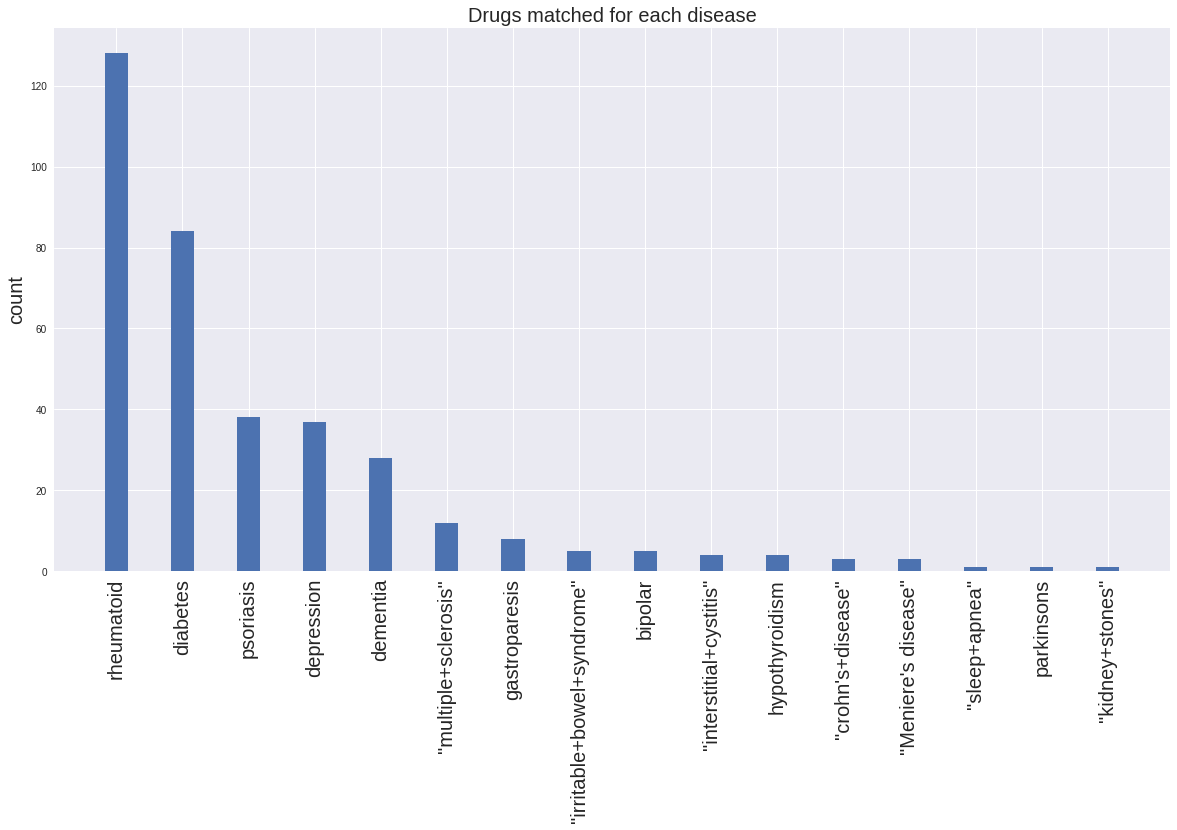

In [92]:
plt.figure(figsize=(20,10))
ind = np.arange(len(values))
width = 0.35
p1 = plt.bar(ind, values, width)
plt.ylabel('count',fontsize='20')
plt.title('Drugs matched for each disease',fontsize='20')
plt.xticks(ind,labels,rotation = 90,fontsize = '20')

plt.show()

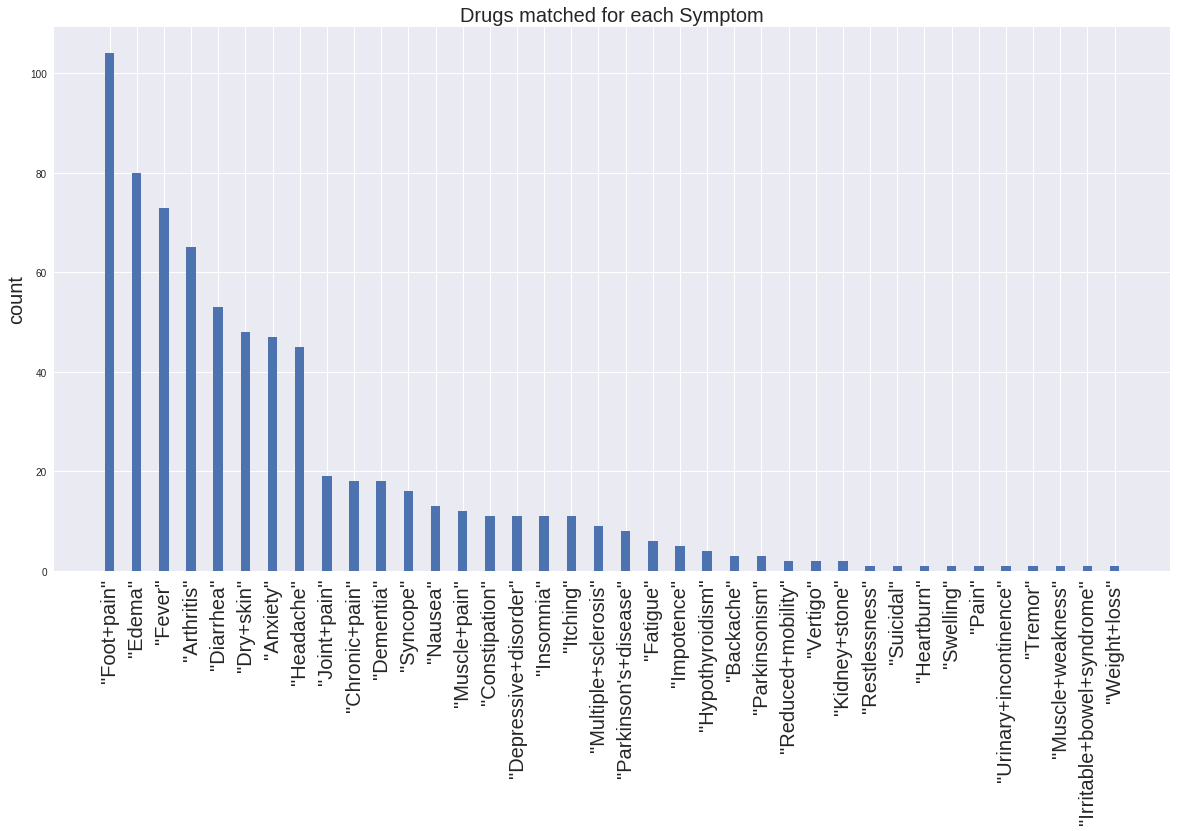

In [94]:
labels = sorted(symDrugs, key=lambda k: symDrugs[k],reverse=True)
values = sorted(symDrugs.values(),reverse=True)
plt.figure(figsize=(20,10))
ind = np.arange(len(values))
width = 0.35
p1 = plt.bar(ind, values, width)
plt.ylabel('count',fontsize='20')
plt.title('Drugs matched for each Symptom',fontsize='20')
plt.xticks(ind,labels,rotation = 90,fontsize = '20')

plt.show()

In [95]:
SymDrugMatchDict

{'0101010B0': {'chemName': 'Almasilate', 'disease': [u'"Diarrhea"']},
 '0101010M0': {'chemName': 'Magaldrate', 'disease': [u'"Diarrhea"']},
 '0102000AB': {'chemName': 'Hyoscyamine Sulphate', 'disease': [u'"Syncope"']},
 '0102000AC': {'chemName': 'Atropine Sulphate', 'disease': [u'"Joint+pain"']},
 '0102000AD': {'chemName': 'Pinaverium Bromide',
  'disease': [u'"Irritable+bowel+syndrome"']},
 '0102000AF': {'chemName': 'Prucalopride', 'disease': [u'"Constipation"']},
 '0102000AG': {'chemName': 'Tegaserod Maleate',
  'disease': [u'"Constipation"']},
 '0102000F0': {'chemName': 'Atropine Methonitrate',
  'disease': [u'"Joint+pain"']},
 '0102000H0': {'chemName': 'Belladonna Alkaloids', 'disease': [u'"Fatigue"']},
 '0102000L0': {'chemName': 'Glycopyrronium Bromide',
  'disease': [u'"Syncope"']},
 '0103010D0': {'chemName': 'Cimetidine', 'disease': [u'"Diarrhea"']},
 '0103010E0': {'chemName': 'Cimetidine With Alginate',
  'disease': [u'"Diarrhea"']},
 '0103010H0': {'chemName': 'Famotidine', 'di

In [102]:
symDrugCount = {}
for f in tqdm(files):
    month = f.split('/')[-1].split('.')[0]
    logger.debug("Working with %s month",(month))
    pdp = pd.read_csv(f,compression='gzip')
    groups = pdp.groupby('11')
    for name , group in groups:
        if name in SymDrugMatchDict:
            if SymDrugMatchDict[name]['chemName'] in symDrugCount:
                symDrugCount[ SymDrugMatchDict[name]['chemName']] += len(group)
            else:
                symDrugCount[ SymDrugMatchDict[name]['chemName']] = len(group)


  0%|          | 0/5 [00:00<?, ?it/s]
Exception in thread Thread-8:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/local/lib/python2.7/dist-packages/tqdm/_tqdm.py", line 148, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration


100%|██████████| 5/5 [02:10<00:00, 26.01s/it]


In [99]:
diseaseDrug = {}
for f in tqdm(files):
    month = f.split('/')[-1].split('.')[0]
    logger.debug("Working with %s month",(month))
    pdp = pd.read_csv(f,compression='gzip')
    groups = pdp.groupby('11')
    for name , group in groups:
        if name in DiseaseDrugMatchDict:
            if DiseaseDrugMatchDict[name]['chemName'] in diseaseDrug:
                diseaseDrug[DiseaseDrugMatchDict[name]['chemName']] += len(group)
            else:
                diseaseDrug[ DiseaseDrugMatchDict[name]['chemName']] = len(group)

100%|██████████| 5/5 [02:11<00:00, 26.36s/it]


In [100]:
diseaseDrug

{'Adalimumab': 64,
 'Alimemazine Tartrate': 18720,
 'Alprazolam': 2,
 'Amantadine Hydrochloride': 18956,
 'Amitriptyline Hydrochloride': 140172,
 'Amoxapine': 5,
 'Anakinra': 5,
 'Aripiprazole': 64581,
 'Atorvastatin': 173280,
 'Auranofin': 26,
 'Azathioprine': 69757,
 'Baclofen': 56655,
 'Betahistine Hydrochloride': 85693,
 'Betamethasone': 1430,
 'Betamethasone Esters': 78295,
 'Betamethasone Sodium Phosphate': 62697,
 'Betamethasone Valerate': 351962,
 'Bromocriptine': 6626,
 'Bupivacaine Hydrochloride': 1619,
 'Buspirone Hydrochloride': 21302,
 'Carbamazepine': 279848,
 'Celecoxib': 54043,
 'Chloramphenicol': 92287,
 'Chlordiazepoxide Hydrochloride': 35214,
 'Chloroquine Phosphate': 1165,
 'Chloroquine Phosphate with Proguanil HCl': 222,
 'Chloroquine Sulphate': 144,
 'Chlorphenamine Maleate': 115967,
 'Chlorpromazine Hydrochloride': 60663,
 'Ciclosporin': 52267,
 'Citalopram Hydrobromide': 134108,
 'Citalopram Hydrochloride': 15658,
 'Clomipramine Hydrochloride': 67025,
 'Clonazep

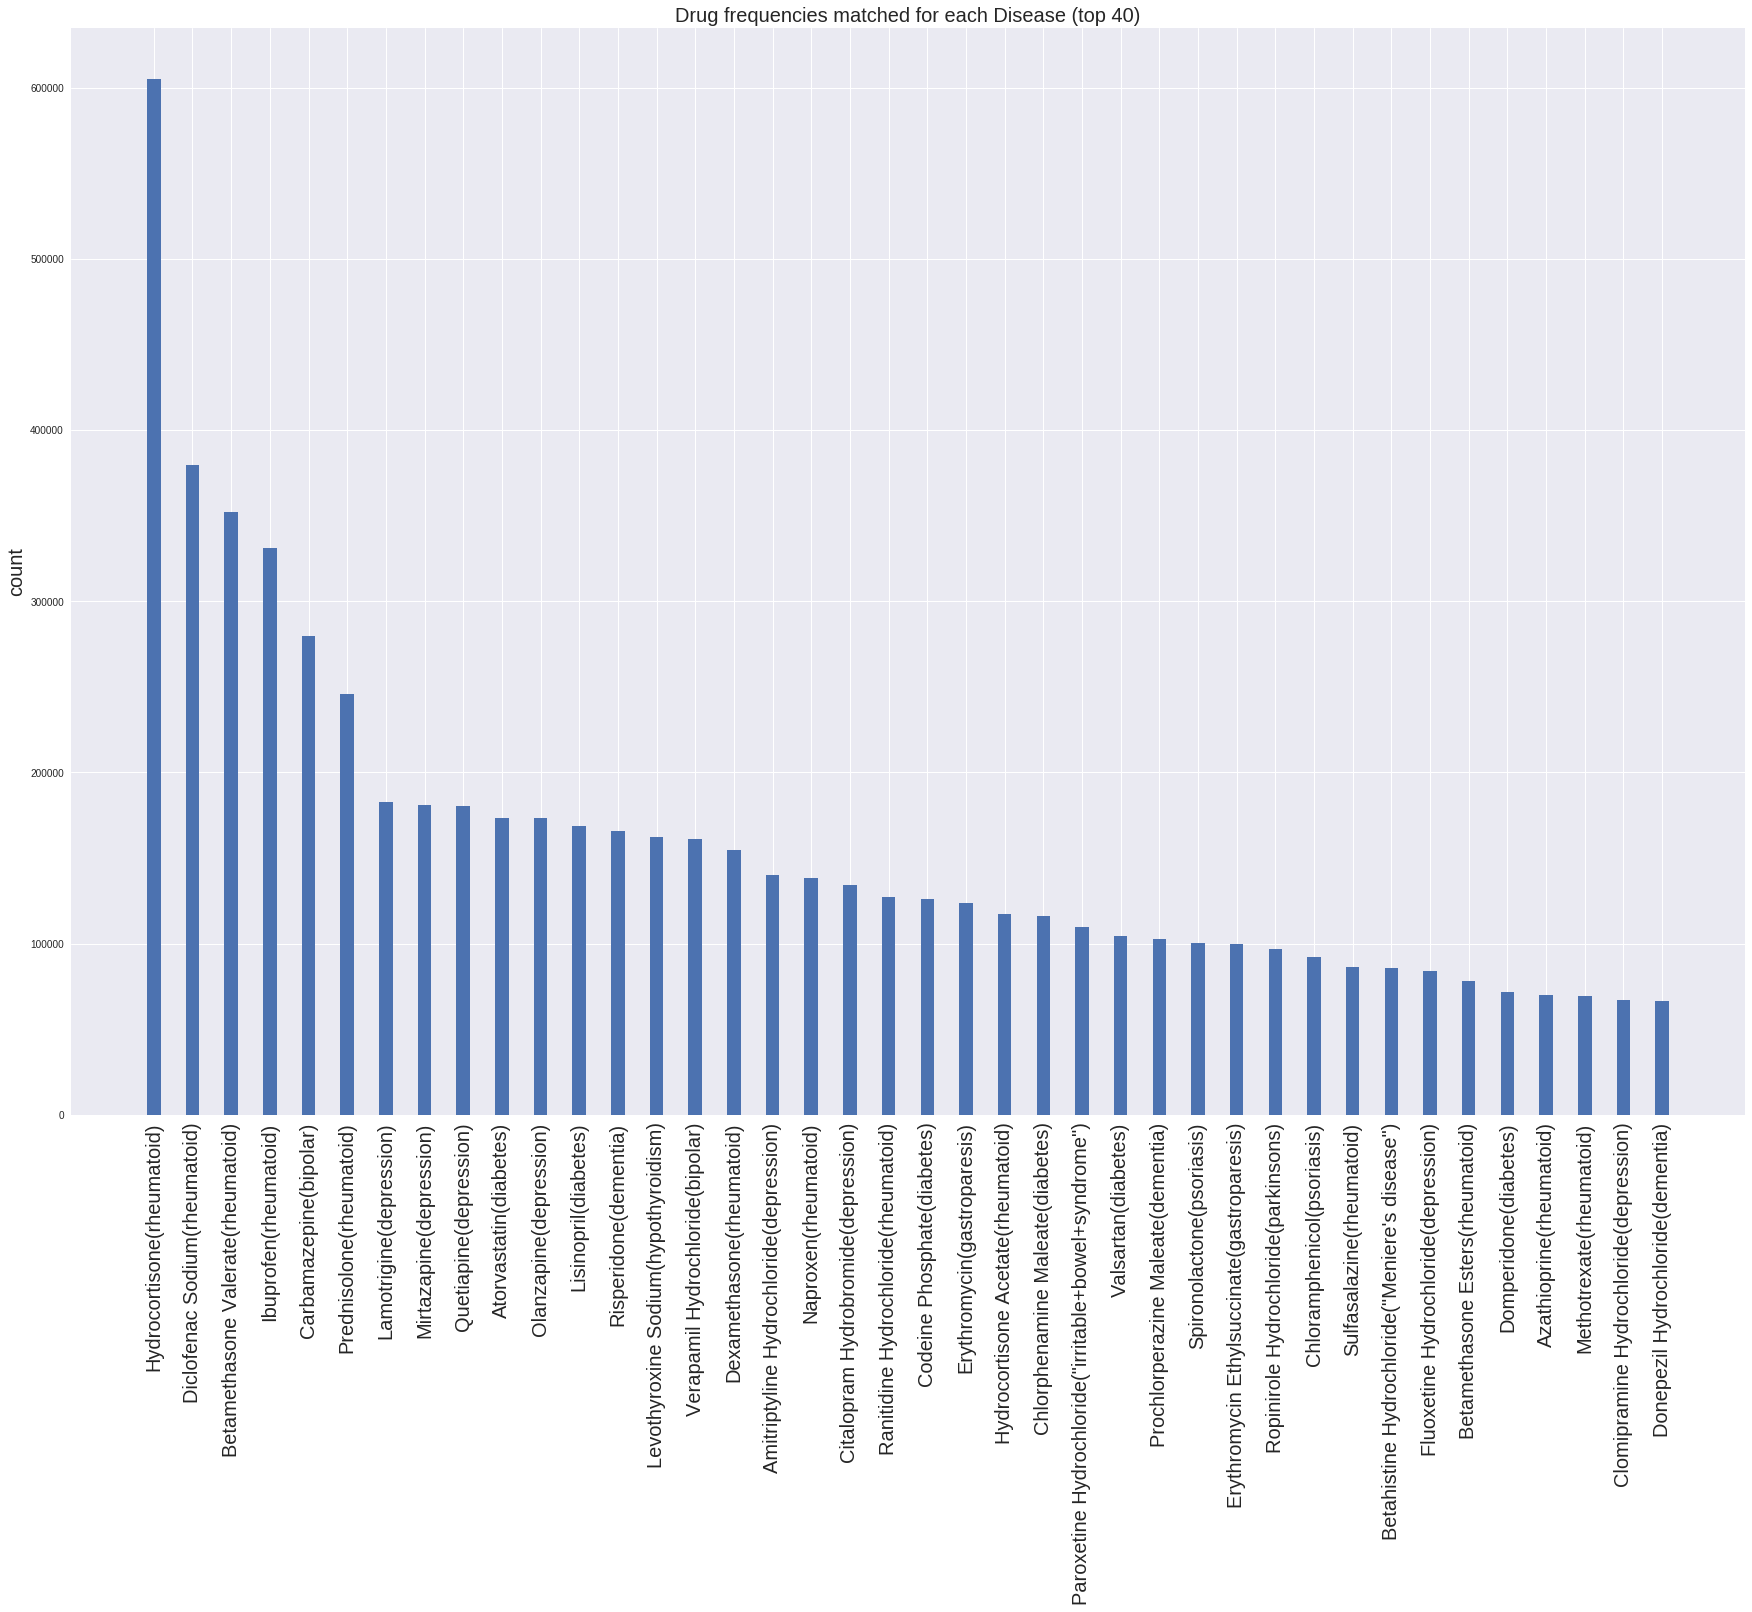

In [113]:
labels = sorted(diseaseDrug, key=lambda k: diseaseDrug[k],reverse=True)
values = sorted(diseaseDrug.values(),reverse=True)
mapping = {}
for k in DiseaseDrugMatchDict:
    mapping[DiseaseDrugMatchDict[k]['chemName']] = DiseaseDrugMatchDict[k]['disease'][0]
labels = [l + "("+mapping[l] + ")" for l in labels ]
plt.figure(figsize=(30,20))
ind = np.arange(len(values[:40]))
width = 0.35
p1 = plt.bar(ind, values[:40], width)
plt.ylabel('count',fontsize='20')
plt.title('Drug frequencies matched for each Disease (top 40)',fontsize='20')
plt.xticks(ind,labels,rotation = 90,fontsize = '20')

plt.show()

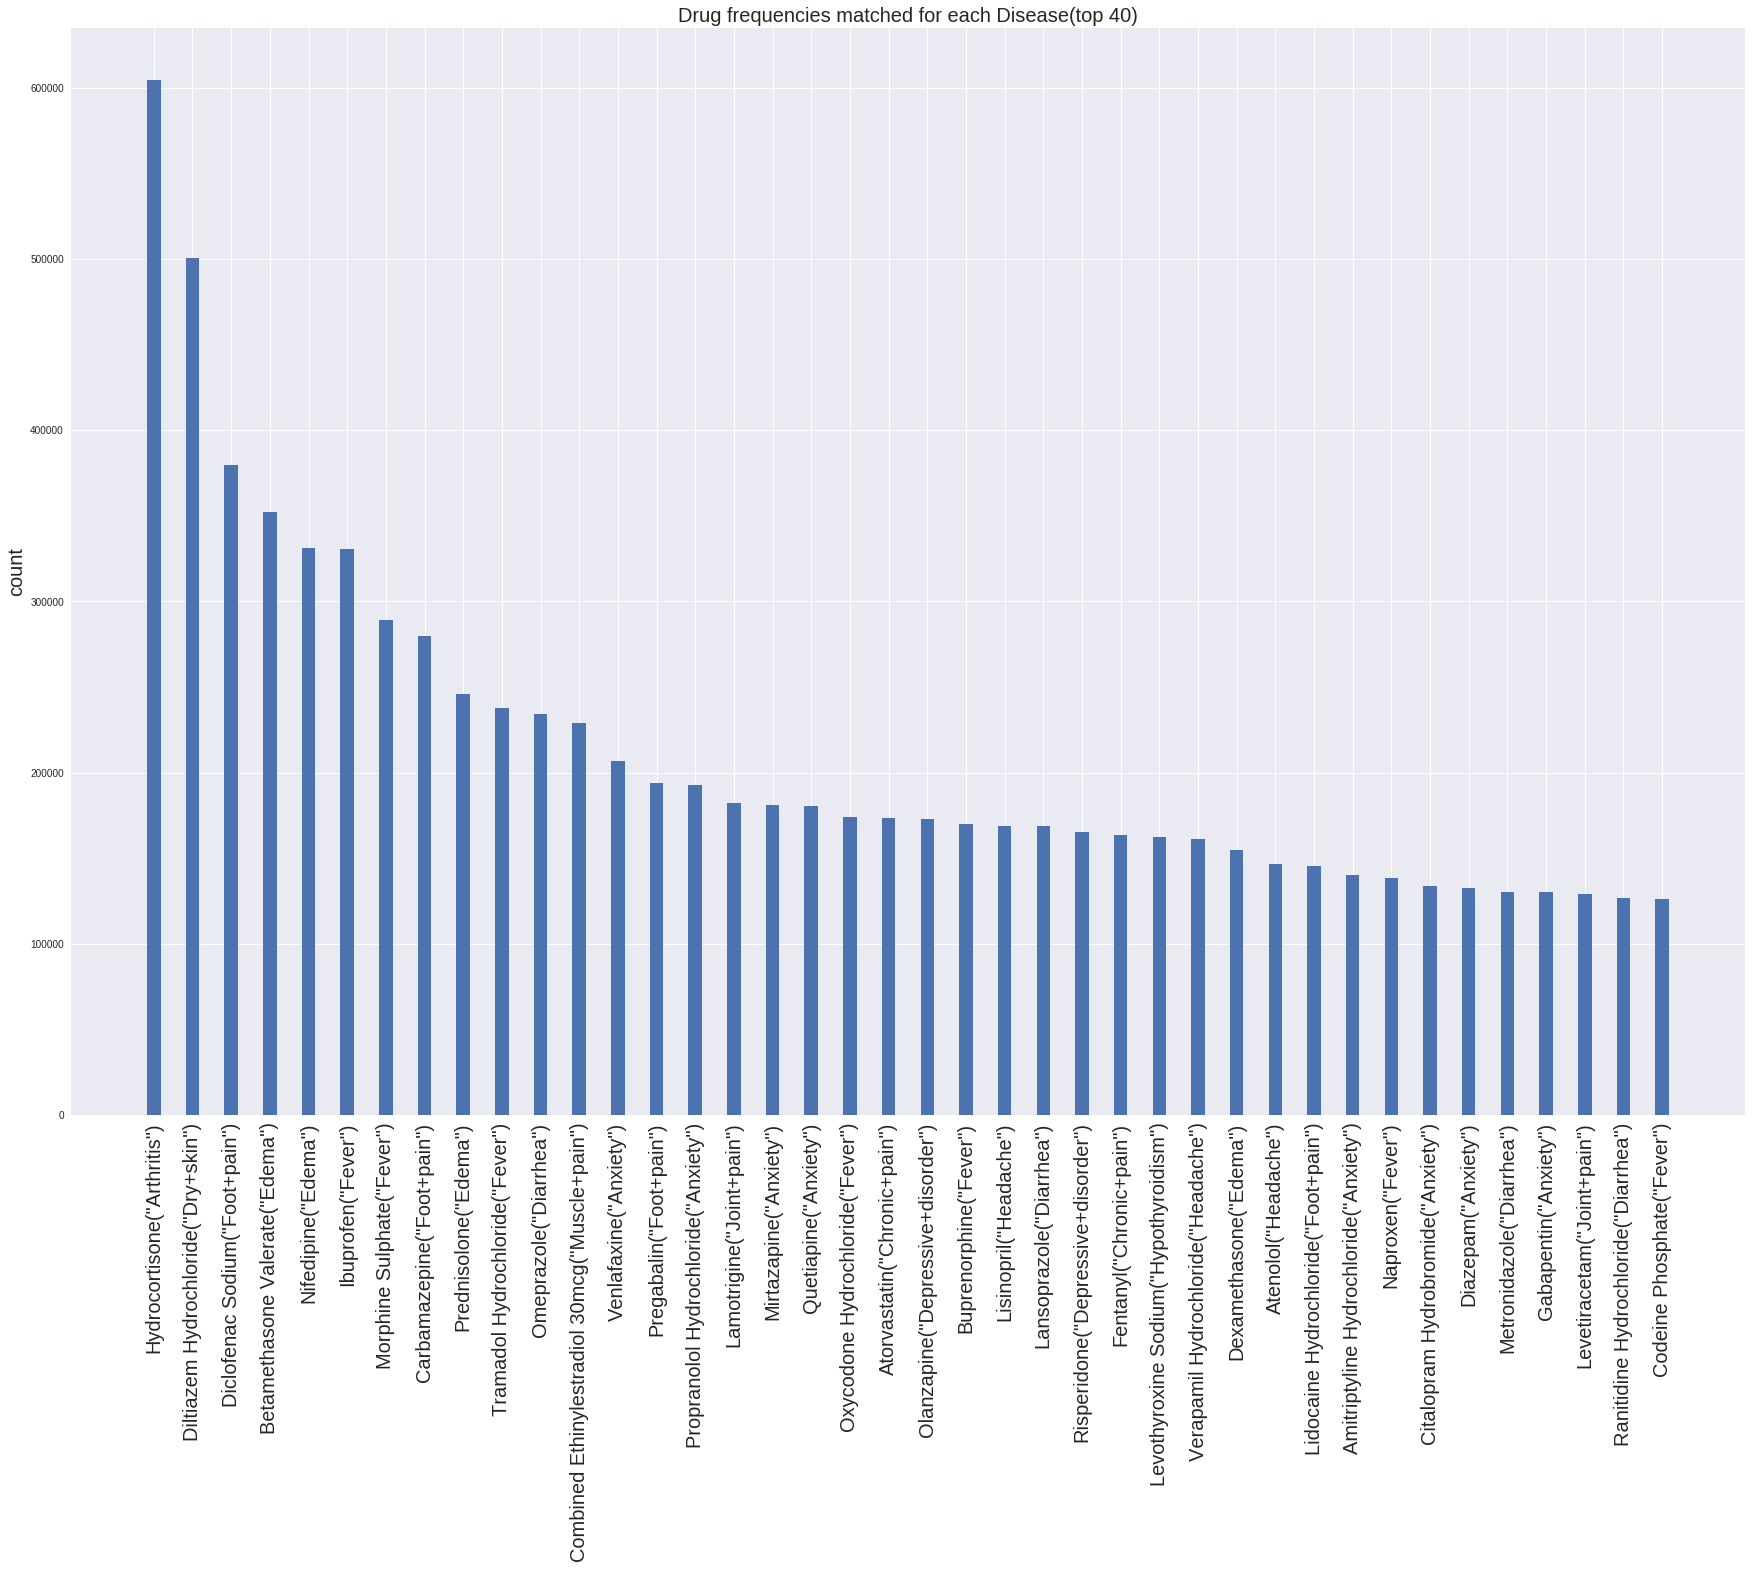

In [115]:
labels = sorted(symDrugCount, key=lambda k: symDrugCount[k],reverse=True)
values = sorted(symDrugCount.values(),reverse=True)
mapping = {}
for k in SymDrugMatchDict:
    mapping[SymDrugMatchDict[k]['chemName']] = SymDrugMatchDict[k]['disease'][0]
labels = [l + "("+mapping[l] + ")" for l in labels ]
plt.figure(figsize=(30,20))
ind = np.arange(len(values[:40]))
width = 0.35
p1 = plt.bar(ind, values[:40], width)
plt.ylabel('count',fontsize='20')
plt.title('Drug frequencies matched for each Disease(top 40)',fontsize='20')
plt.xticks(ind,labels,rotation = 90,fontsize = '20')

plt.show()